In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_json('data/train_new.json')

In [3]:
df.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [5]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [6]:
'fraudster' in df.acct_type.values[0]

True

In [7]:
df['cat3'] = df.acct_type.apply(lambda x: 0 if x=='premium' else 1 if 'fraudster' in x else 2)
df['cat2'] = df.acct_type.apply(lambda x: True if 'fraudster' in x else False)

In [8]:
df['cat2'].value_counts()

False    13044
True      1293
Name: cat2, dtype: int64

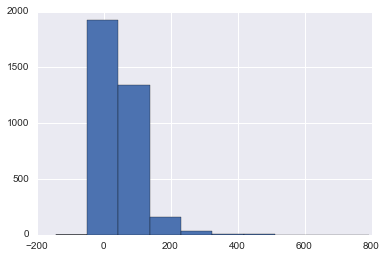

In [9]:
df[df['sale_duration'] != df['sale_duration2']].sale_duration.hist(bins = 10)

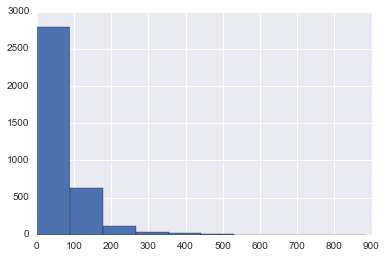

In [10]:
df[df['sale_duration'] != df['sale_duration2']].sale_duration2.hist(bins = 10)

In [11]:
(df[df['sale_duration'] != df['sale_duration2']]['sale_duration'] - df[df['sale_duration'] != df['sale_duration2']]['sale_duration2']).median()

-5.0

In [12]:
dat['listed_n'] = dat.listed.apply(lambda x: 1 if x == 'y' else 0)

NameError: name 'dat' is not defined

In [27]:
ones = ['channels', 'body_length', 'fb_published', 'gts', 'has_analytics', 'has_logo', 'num_order', 'num_payouts', 'org_facebook', 'org_twitter', 'show_map', 'user_age', ]

# DATA

In [28]:
clean = df.dropna()
print clean.shape
print clean.cat2.value_counts()

(8224, 46)
False    7866
True      358
Name: cat2, dtype: int64


In [29]:
X = clean[ones]
y = clean['cat2']

In [30]:
from sklearn.cross_validation import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1)

# Model 1

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr1 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight='balanced', random_state=None, 
                   solver='liblinear', max_iter=100, multi_class='ovr', verbose=3, 
                   warm_start=False, n_jobs=1)

In [34]:
from sklearn.cross_validation import cross_val_score

In [35]:
cross_val_score(lr1, X_train, y=y_train, scoring='recall', 
                cv=5, n_jobs=1, verbose=5, 
                fit_params=None, pre_dispatch='2*n_jobs')

[CV] no parameters to be set .........................................
[LibLinear][CV] ................ no parameters to be set, score=0.924242 -   0.1s
[CV] no parameters to be set .........................................
[LibLinear][CV] ................ no parameters to be set, score=0.878788 -   0.1s
[CV] no parameters to be set .........................................
[LibLinear][CV] ................ no parameters to be set, score=0.938462 -   0.1s
[CV] no parameters to be set .........................................
[LibLinear][CV] ................ no parameters to be set, score=0.923077 -   0.1s
[CV] no parameters to be set .........................................
[LibLinear][CV] ................ no parameters to be set, score=0.892308 -   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


array([ 0.92424242,  0.87878788,  0.93846154,  0.92307692,  0.89230769])

In [36]:
lr1.fit(X_train, y_train)
preds = lr1.predict_proba(X_test)
preds1 = lr1.predict(X_test)

[LibLinear]

In [37]:
lr1.classes_

array([False,  True], dtype=bool)

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, preds[:,1], average='macro', sample_weight=None)

0.92807103290974258

In [39]:
from sklearn.metrics import recall_score

recall_score(y_test, preds1)

0.93548387096774188

In [40]:
lr1.score(X_test, y_test)

0.7995139732685298

In [41]:
from sklearn.metrics import precision_score

precision_score(y_test, preds1)

0.15104166666666666

In [42]:
import numpy as np
def confusion_matrix(y_true,y_pred):
    y_true = np.array(y_true)
    tp = np.sum(y_true*y_pred*np.ones(len(y_true)))
    fp = np.sum(y_pred*(np.ones(len(y_true))-y_true))
    fn = np.sum(y_true*(np.ones(len(y_true))-y_pred))
    tn = len(y_true) - tp - fp - fn
    return np.array([[tp,fp],[fn,tn]])

In [43]:
type(preds1)

numpy.ndarray

In [44]:
confusion_matrix(y_test,preds1)

array([[  29.,  163.],
       [   2.,  629.]])

In [45]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(learning_rate=.001, n_estimators=100000)

In [57]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.001, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [58]:
xgpreds = xgb.predict_proba(X_test)

In [59]:
roc_auc_score(y_test, xgpreds[:,1])

0.97539915281850764